1. Load Your Existing Model
You can load your current trained CNN model and evaluate it if needed:

In [93]:
import matplotlib.pyplot as plt
import cv2
import glob
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Input,Conv2D,Activation,BatchNormalization,MaxPooling2D,Flatten,Dense,Dropout,add
from random import sample
from imblearn.under_sampling import RandomUnderSampler

ImportError: cannot import name 'ImageDataGenerator' from 'keras.preprocessing.image' (C:\Users\kenza.chenni\AppData\Roaming\Python\Python312\site-packages\keras\api\preprocessing\image\__init__.py)

In [95]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array


In [97]:
batch_size = 128

In [99]:
train_datagen = ImageDataGenerator(rotation_range=40,rescale=1./255,zoom_range=0.2,vertical_flip=True,validation_split=0.2)

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# Define the batch size for loading data
batch_size = 32  # You can change this to your preferred batch size

#train_generator = train_datagen.flow_from_directory(
        '/content/all_images',  # this is the target directory
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='categorical',subset="training")

In [103]:
root_dir = r'C:\Users\kenza.chenni\Documents\Desktop\acıbademsana'

In [105]:
 # Adjust this path to your actual directory

# Initialize the ImageDataGenerator with data augmentation for training


# Create the train generator
train_generator = train_datagen.flow_from_directory(
    root_dir,  # The root directory where the cancer and non_cancer subfolders are located
    target_size=(50, 50),  # Resize images to the desired size (224x224 is commonly used)
    batch_size=batch_size,
    class_mode='categorical',  # For multi-class classification (Cancer vs Non-Cancer)
    subset="training",  # Optionally specify a subset for training data if using validation_split
)  # If you want to use 20% of data for validation, specify this

Found 31427 images belonging to 2 classes.


In [106]:
validation_generator = train_datagen.flow_from_directory(
        root_dir,  # this is the target directory
        target_size=(50, 50),
        batch_size=batch_size,
        class_mode='categorical',subset="validation")

Found 7855 images belonging to 2 classes.


In [107]:
num_classes = 2
inputs = Input(shape=(50, 50, 3))

In [108]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [109]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, add
from tensorflow.keras.models import Model


conv1 = Conv2D(32, (3, 3), activation='relu',padding='same')(inputs)
conv2 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv1)

maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool2)
conv4 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv3)


skip1 = add([maxpool2, conv4])

conv5 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip1)
conv6 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv5)

maxpool6 = MaxPooling2D(pool_size=(2, 2))(conv6)

conv7 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool6)
conv8 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv7)


skip2 = add([maxpool6, conv8])

conv9 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip2)
conv10 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv9)

maxpool9 = MaxPooling2D(pool_size=(2, 2))(conv10)

conv11 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool9)
conv12 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv11)

skip3 = add([maxpool9, conv12])

conv13 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip3)
conv14 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv13)

maxpool10 = MaxPooling2D(pool_size=(2, 2))(conv14)

conv15 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool10)
conv16 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv15)

skip4 = add([maxpool10, conv16])

conv17 = Conv2D(32, (3, 3), activation='relu',padding='same')(skip4)
conv18 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv17)

maxpool11 = MaxPooling2D(pool_size=(2, 2))(conv18)

conv19 = Conv2D(32, (3, 3), activation='relu',padding='same')(maxpool11)
conv20 = Conv2D(32, (3, 3), activation='relu',padding='same')(conv19)

skip5 = add([maxpool11, conv20])


flat = Flatten()(skip5)
dense9=Dense(16,activation='relu')(flat)
predictions=Dense(2,activation='softmax')(dense9)

In [110]:

model = Model(inputs=inputs, outputs=predictions)

In [111]:
model.compile("adam", "categorical_crossentropy", metrics=['accuracy'])

In [112]:
fitted = model.fit(train_generator, steps_per_epoch=200, epochs=20,validation_data=validation_generator,validation_steps=80)

     

Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3580s 18s/step - accuracy: 0.9269 - loss: 0.2558 - val_accuracy: 0.9528 - val_loss: 0.2153
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1414s 7s/step - accuracy: 0.9530 - loss: 0.1811 - val_accuracy: 0.9528 - val_loss: 0.2292
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3611s 18s/step - accuracy: 0.9495 - loss: 0.1961 - val_accuracy: 0.9528 - val_loss: 0.2266
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1376s 7s/step - accuracy: 0.9497 - loss: 0.1897 - val_accuracy: 0.9528 - val_loss: 0.2397
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3520s 18s/step - accuracy: 0.9532 - loss: 0.1790 - val_accuracy: 0.9528 - val_loss: 0.2377
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1351s 7s/step - accuracy: 0.9592 - loss: 0.1597 - val_accuracy: 0.9528 - val_loss: 0.2322
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 3450s 17s/step - accuracy: 0.9519 - loss: 0.1802 - val_accuracy: 0.9001 - val_loss: 0.2829
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1384s 7s/step - accuracy: 0.9534 - loss: 0.168

KeyError: 'acc'

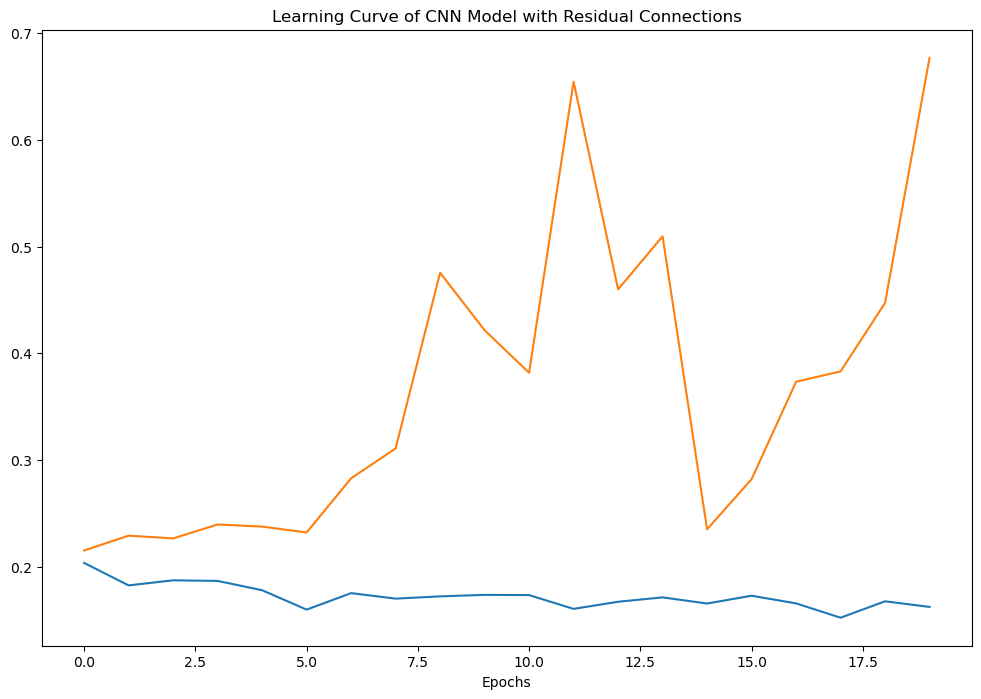

In [121]:
df = pd.DataFrame(fitted.history)
plt.figure(figsize=(12,8))
plt.xlabel('Epochs')
plt.title('Learning Curve of CNN Model with Residual Connections')

ax1 = df['loss'].plot( label='Loss')
ax1 = df['val_loss'].plot( label='Val Loss')
ax2 = df['acc'].plot(secondary_y=True, label='Accuracy')
ax2 = df['val_acc'].plot(secondary_y=True, label='Val Accuracy')

ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
ax1.legend(loc=2)
ax2.legend(loc=1)

plt.show()
     

In [123]:
df

,accuracy,loss,val_accuracy,val_loss
0,0.948941,0.203660,0.952769,0.215294
1,0.952615,0.182628,0.952769,0.229211
2,0.952269,0.187372,0.952769,0.226627
3,0.950577,0.186807,0.952769,0.239651
4,0.953789,0.178109,0.952769,0.237679
5,0.959156,0.159928,0.952769,0.232178
6,0.953600,0.175379,0.900064,0.282908
7,0.952615,0.170225,0.952769,0.310874
8,0.953992,0.172337,0.716996,0.475471
9,0.954314,0.173749,0.802801,0.421634


In [125]:
# Save the model in .keras format
model.save("resnet.keras")


In [127]:
from tensorflow.keras.models import load_model
model = load_model("resnet.keras")


In [129]:
model

<Functional name=functional_59, built=True>

In [131]:
model.summary()


Model: "functional_59"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 50, 50, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_84 (Conv2D)            │ (None, 50, 50, 32)        │             896 │ input_layer_6[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_85 (Conv2D)            │ (None, 50, 50, 32)        │           9,248 │ conv2d_84[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_21              │ (None, 25, 25, 32)        │               0 │ conv2d_85[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_86 (Conv2D)            │ (None, 25, 25, 32)        │           9,248 │ max_pooling2d_21[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_87 (Conv2D)            │ (None, 25, 25, 32)        │           9,248 │ conv2d_86[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_20 (Add)                  │ (None, 25, 25, 32)        │               0 │ max_pooling2d_21[0][0],    │
│                               │                           │                 │ conv2d_87[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_88 (Conv2D)            │ (None, 25, 25, 32)        │           9,248 │ add_20[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_89 (Conv2D)            │ (None, 25, 25, 32)        │           9,248 │ conv2d_88[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_22              │ (None, 12, 12, 32)        │               0 │ conv2d_89[0][0]            │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_90 (Conv2D)            │ (None, 12, 12, 32)        │           9,248 │ max_pooling2d_22[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_91 (Conv2D)            │ (None, 12, 12, 32)        │           9,248 │ conv2d_90[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add_21 (Add)                  │ (None, 12, 12, 32)        │               0 │ max_pooling2d_22[0][0],    │
│                               │                           │                 │ conv2d_91[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_92 (Conv2D)            │ (None, 12, 12, 32)        │           9,248 │ add_21[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_93 (Conv2D)            │ (None, 12, 12, 32)        │           9,248 │ conv2d_92[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 531,512 (2.03 MB)

 Trainable params: 177,170 (692.07 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 354,342 (1.35 MB)

loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)


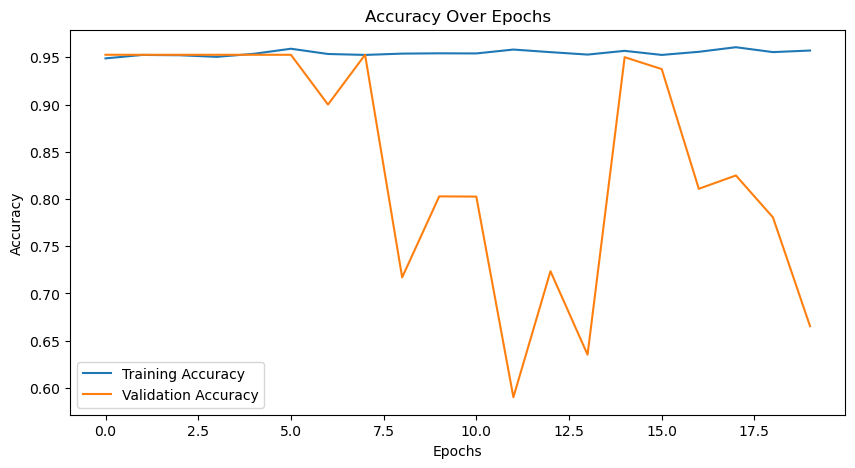

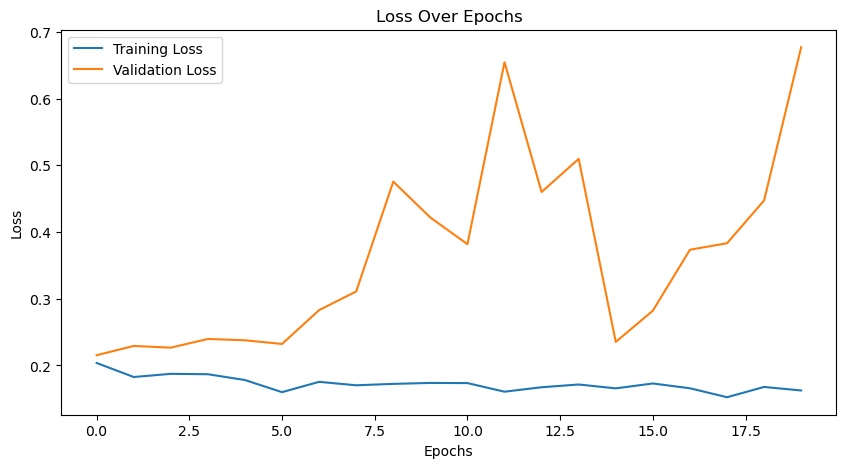

In [135]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df['accuracy'], label='Training Accuracy')
plt.plot(df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.show()

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(df['loss'], label='Training Loss')
plt.plot(df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()


In [137]:
# Best Validation Accuracy
best_epoch_val_acc = df['val_accuracy'].idxmax()
print(f"Best Epoch (Val Accuracy): {best_epoch_val_acc}")
print(df.loc[best_epoch_val_acc])

# Best Validation Loss
best_epoch_val_loss = df['val_loss'].idxmin()
print(f"Best Epoch (Val Loss): {best_epoch_val_loss}")
print(df.loc[best_epoch_val_loss])


Best Epoch (Val Accuracy): 0
accuracy        0.948941
loss            0.203660
val_accuracy    0.952769
val_loss        0.215294
Name: 0, dtype: float64
Best Epoch (Val Loss): 0
accuracy        0.948941
loss            0.203660
val_accuracy    0.952769
val_loss        0.215294
Name: 0, dtype: float64


In [139]:
predictions = model.predict(X_sample)
print(predictions)


NameError: name 'X_sample' is not defined